# &#x1F4D1; &nbsp; $\mathfrak {P8: \ Analyzing \ the \ NYC \ Subway \ Dataset}$

###  &#x1F4CA; &nbsp; Section 0. References and Code Library

Turnstile and Weather Variables: 
https://s3.amazonaws.com/uploads.hipchat.com/23756/665149/05bgLZqSsMycnkg/turnstile-weather-variables.pdf

Scipy. Statistics in Python:
http://www.scipy-lectures.org/packages/statistics/index.html

Hypothesis Testing - MIT OpenCourseWare:
https://ocw.mit.edu/resources/res-6-009-how-to-process-analyze-and-visualize-data-january-iap-2012/lectures-and-labs/MITRES_6_009IAP12_lab3a.pdf

Assumptions of the Mann-Whitney U test:
https://statistics.laerd.com/premium-sample/mwut/mann-whitney-test-in-spss-2.php

List of statistical packages:
https://en.wikipedia.org/wiki/List_of_statistical_packages

In [2]:
from IPython.core.display import HTML
hide_code = ''
HTML('''
<style>
body {background-color: aliceblue;}
a {color: steelblue;}
h1, h2, h3 { color: #4169E1;}
</style>
<script>code_show = true; 
function code_display() {
    if (code_show) {
        $('div.input').each(function(id) {
            if (id == 0 || $(this).html().indexOf('hide_code') > -1) {$(this).hide();}
        });
        $('div.output_prompt').css('opacity', 0);
    } else {
        $('div.input').each(function(id) {$(this).show();});
        $('div.output_prompt').css('opacity', 1);
    }
    code_show = !code_show;
} 
$(document).ready(code_display);</script>
<form action="javascript: code_display()"><input \
style="color: #4169E1; background: ghostwhite; opacity: 0.9; " \
type="submit" value="Click to display or hide code"></form>''')

In [4]:
hide_code
# Import libraries
import numpy as np
import pandas as pd
import time
import warnings
import matplotlib
import matplotlib.pyplot as plt
from ggplot import *
from IPython.core.display import display 

# Display for notebooks
%matplotlib inline

################################
### ADD EXTRA LIBRARIES HERE ###
################################
from scipy.stats import mannwhitneyu
import seaborn as sns
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.metrics import r2_score
from scipy.stats import linregress
from sklearn.preprocessing import normalize

### &#x1F4CA; &nbsp;  Section 1. Statistical Test

#### 1.1 Data Extraction and Description

In [5]:
hide_code
# Load the data from the csv file
turnstile_data = pd.read_csv('turnstile_data_master_with_weather.csv').drop('index', 1)
# Display the data description
turnstile_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Hour,131951.0,10.896158,6.892084,0.00,5.00,12.00,17.00,23.00
ENTRIESn_hourly,131951.0,1095.348478,2337.015421,0.00,39.00,279.00,1109.00,51839.00
EXITSn_hourly,131951.0,886.890838,2008.604886,0.00,32.00,232.00,847.00,45249.00
maxpressurei,131951.0,30.031894,0.125689,29.74,29.96,30.03,30.10,30.31
maxdewpti,131951.0,57.241302,8.770891,39.00,50.00,57.00,64.00,70.00
mindewpti,131951.0,48.259013,11.305312,22.00,38.00,51.00,55.00,66.00
minpressurei,131951.0,29.892714,0.146384,29.54,29.84,29.91,29.97,30.23
meandewpti,131951.0,52.703526,9.943590,31.00,45.00,54.00,60.00,68.00
meanpressurei,131951.0,29.965077,0.130461,29.64,29.91,29.96,30.05,30.27
fog,131951.0,0.167100,0.373066,0.00,0.00,0.00,0.00,1.00


In [6]:
hide_code
print ('Data Medians')
turnstile_data.median()

Data Medians


Hour                12.00
ENTRIESn_hourly    279.00
EXITSn_hourly      232.00
maxpressurei        30.03
maxdewpti           57.00
mindewpti           51.00
minpressurei        29.91
meandewpti          54.00
meanpressurei       29.96
fog                  0.00
rain                 0.00
meanwindspdi         5.00
mintempi            54.00
meantempi           63.00
maxtempi            71.00
precipi              0.00
thunder              0.00
dtype: float64

#### 1.2 Test Selection

***Question 1.1*** Which statistical test did you use to analyze the NYC subway data? Did you use a one-tail or a two-tail P value? What is the null hypothesis? What is your p-critical value?

***Answer 1.1*** 

The *Mann-Whitney U Test* to compare the ridership of NYC subway in rainy and non-rainy days is a good choice. 

The column *'ENTRIESn_hourly'* will be the target and the column *'rain'* - the feature. 

I will test the *null hypothesis*: the distributions of ridership in NYC subway are the same for rainy and non-rainy days. Another variant of this hypothesis could be: the difference between ridership medians / means for rainy and non-rainy days is equal to zero.

I will use a *two-tailed test* to find the statistical significance in both possible directions of interest.

Let's setup the *p-critical value* is equal to 0.05: we will reject the null hypothesis at the *confidence level* of 95%.

***Question 1.2*** Why is this statistical test applicable to the dataset? In particular, consider the assumptions that the test is making about the distribution of ridership in the two samples.

***Answer 1.2***

The *Mann-Whitney U Test* is a non-parametric alternative test for comparing two sample medians / means (or two distributions) that come from the same population.

I have noted that the distribution of *'ENTRIESn_hourly'* is not normal so I cannot use the t-test in this case.

The features' specifics for the Mann-Whitney U test:

- 1) one dependent variable is measured at the continuous or ordinal level (*'ENTRIESn_hourly'*),
- 2) one independent variable consists of two categorical, independent groups (*'rain'*),
- 3) independence of observations (true for this data, the samples do not affect each other),
- 4) if two distributions have the same shapes, the test determines differences in the medians / means of two groups, if they have different shapes - differences in the distributions of two groups (distributions in our case, the shapes are similar but with different levels),
- 5) two samples under consideration could not have the same number of observations (true for this data).

#### 1.3 Test Execution
At first,I will describe two samples, then I will run the test and display the results.

In [7]:
hide_code
print("ENTRIESn_hourly in rainy days")
rainy_entries_hourly = turnstile_data['ENTRIESn_hourly'][turnstile_data['rain']==1]
rainy_entries_hourly.describe()

ENTRIESn_hourly in rainy days


count    44104.000000
mean      1105.446377
std       2370.527674
min          0.000000
25%         41.000000
50%        282.000000
75%       1103.250000
max      51839.000000
Name: ENTRIESn_hourly, dtype: float64

In [8]:
hide_code
print("ENTRIESn_hourly in non-rainy days")
non_rainy_entries_hourly = turnstile_data['ENTRIESn_hourly'][turnstile_data['rain']==0]
non_rainy_entries_hourly.describe()

ENTRIESn_hourly in non-rainy days


count    87847.000000
mean      1090.278780
std       2320.004938
min          0.000000
25%         38.000000
50%        278.000000
75%       1111.000000
max      43199.000000
Name: ENTRIESn_hourly, dtype: float64

In [9]:
hide_code
with_rain_median = np.median(rainy_entries_hourly)
without_rain_median = np.median(non_rainy_entries_hourly)
with_rain_mean = np.mean(rainy_entries_hourly)
without_rain_mean = np.mean(non_rainy_entries_hourly)
U, p = mannwhitneyu(rainy_entries_hourly, non_rainy_entries_hourly, alternative='two-sided')

print ("Mean for rainy days: {:.0f}".format(with_rain_mean))
print ("Mean for non-rainy days: {:.0f}".format(without_rain_mean))
print ("Median for rainy days: {:.0f}".format(with_rain_median))
print ("Median for non-rainy days: {:.0f}".format(without_rain_median))
print ("Number of rainy days: {:.0f}".format(len(rainy_entries_hourly)))
print ("Number for non-rainy days: {:.0f}".format(len(non_rainy_entries_hourly)))
print ("Mann-Whitney U test: U = {:.0f}, p = {:.5f}".format(U,p))

Mean for rainy days: 1105
Mean for non-rainy days: 1090
Median for rainy days: 282
Median for non-rainy days: 278
Number of rainy days: 44104
Number for non-rainy days: 87847
Mann-Whitney U test: U = 1949994921, p = 0.04988


***Question 1.3*** What results did you get from this statistical test? These should include the following numerical values: p-values, as well as the medians / means for each of the two samples under test.

***Answer 1.3***

The mean values of ENTRIESn_hourly in rainy days and in non-rainy days are 1105 and 1090. 

The median values of ENTRIESn_hourly in rainy days and in non-rainy days are 282 and 278.

The number of rainy and non-rainy days are 44104 and 87847.

The p-value of Mann-Whitney U-Test is 0.04988.

***Question 1.4*** What is the significance and interpretation of these results?

***Answer 1.4***

The median / mean values of ENTRIESn_hourly in rainy days is only a little bit larger than in non-rainy days. I cannot determine whether the null hypothesis is rejected or not based on the difference between each pair of values.

The Mann-Whitney U-Test detects more informative results on whether the null hypothesis is true or not. The p-value of this test is 0.04988 and it's less than the p-critical value. Therefore, I can confirm that the null hypothesis is rejected with 95% of confidence level.

### &#x1F4CA; &nbsp;  Section 2. Linear Regression
In this section, I will use the improved dataset turnstile_weather_v2.csv. Let's load and describe it.

In [10]:
hide_code
# Load the data from the csv file
turnstile_data2 = pd.read_csv('turnstile_weather_v2.csv')
# Display the data example
turnstile_data2.head().T

,0,1,2,3,4
UNIT,R003,R003,R003,R003,R003
DATEn,05-01-11,05-01-11,05-01-11,05-01-11,05-01-11
TIMEn,00:00:00,04:00:00,12:00:00,16:00:00,20:00:00
ENTRIESn,4388333,4388333,4388333,4388333,4388333
EXITSn,2911002,2911002,2911002,2911002,2911002
ENTRIESn_hourly,0,0,0,0,0
EXITSn_hourly,0,0,0,0,0
datetime,2011-05-01 00:00:00,2011-05-01 04:00:00,2011-05-01 12:00:00,2011-05-01 16:00:00,2011-05-01 20:00:00
hour,0,4,12,16,20
day_week,6,6,6,6,6


***Question 2.1*** What approach did you use to compute the coefficients theta and produce prediction for ENTRIESn_hourly in your regression model:

- OLS using Statsmodels or Scikit Learn
- Gradient descent using Scikit Learn
- Or something different?

***Answer 2.1***

To produce predictions I would like to try a simple ordinary least squares model *OLS Statsmodels*, stochastic gradient descent regression *SGDRegressor Scikit Learn* and the set of built functions (*normalize_features()*, *compute_cost()*, *gradient_descent()*, *predictions()*). It will be interesting to compare the results.

##### 2.1.1 Predictions by the Set of Built Functions

In [11]:
hide_code
# Function for normalizing the features 
def normalize_features(data):
    mu, sigma = data.mean(), data.std()
    
    if (sigma == 0).any():
        raise Exception("One of the features had the same value for all samples and could not be normalized." +  
                        "Do not include features with only a single value in the model.")
        
    data_normalized = (data - mu) / sigma
    return data_normalized, mu, sigma

# Cost function
def compute_cost(features, values, theta):
    
    sum_of_square_errors = np.square(np.dot(features, theta) - values).sum()
    cost = sum_of_square_errors / (2 * len(values))

    return cost

# Gradient descent function
def gradient_descent(features, values, theta, alpha, num_iterations):
    cost_history = []

    for i in range(num_iterations):
        delta = (np.dot((values - np.dot(features, theta)), features)) / len(values)
        theta = theta + alpha * delta
        cost_history.append(compute_cost(features, values, theta))

    return theta, pd.Series(cost_history)

# Gradient descent function
def predictions(dataframe, numerical, target):
    # Add selected features 
    features = dataframe[numerical]
    
    # Add UNIT to features using dummy variables
    dummy_units = pd.get_dummies(dataframe['UNIT'], prefix='unit')
    features = features.join(dummy_units)
    
    # Target values
    values = dataframe[target]

    # Normalize features
    features, mu, sigma = normalize_features(features)
    
    # Add a column of 1s (y intercept)
    features['ones'] = np.ones(len(values))
    
    # Convert features and values to numpy arrays
    features_array = np.array(features)
    values_array = np.array(values)

    # Set values for alpha, number of iterations.
    alpha = 0.1 
    num_iterations = 50 

    # Initialize theta, perform gradient descent
    theta_gradient_descent = np.zeros(len(features.columns))
    theta_gradient_descent, cost_history = \
    gradient_descent(features_array, values_array, theta_gradient_descent, alpha, num_iterations)
    
    predictions = np.dot(features_array, theta_gradient_descent)
    return predictions, theta_gradient_descent

In [12]:
hide_code
# Setup the feature list
numerical2 = ['rain', 'hour', 'weekday', 'meantempi']
predict = predictions(turnstile_data2, numerical2, 'ENTRIESn_hourly')
print ("Predictions for 'ENTRIESn_hourly'")
predict[0]

Predictions for 'ENTRIESn_hourly'


array([-1631.01609039, -1140.11804959,  -158.32196798, ...,   325.81555702,
         816.71359783,  1307.61163863])

The code cells below produce predictions and display the histogram of residuals (the differences between the observed values and the estimated values).

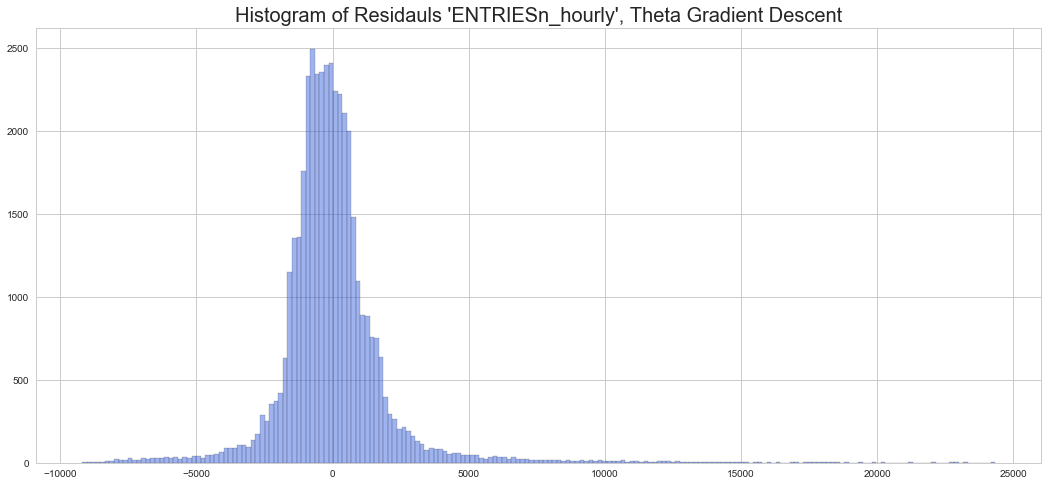

In [13]:
hide_code
def plot_residuals(data, predictions):
    matplotlib.rcParams['figure.figsize'] = (18, 8)
    plt.style.use('seaborn-whitegrid')
    plt.figure()
    (data['ENTRIESn_hourly'] - predictions).hist(bins=200, color='royalblue', edgecolor='black', alpha=0.5)

    plt.title("Histogram of Residauls 'ENTRIESn_hourly', Theta Gradient Descent", fontsize=20)
    return plt

# Create predictions
plot_residuals(turnstile_data2, predict[0]);

##### 2.1.2 Predictions by the OLS Model

In [14]:
hide_code
def ols_predictions(data, feature_list):
    # Choose features and a target 
    X = data[feature_list]
    y = data['ENTRIESn_hourly']
    
    # Add UNIT to features using dummy variables
    dummy_units = pd.get_dummies(data['UNIT'], prefix='unit')
    X = data[feature_list].join(dummy_units)
    
    # Normalize features
    X, mu, sigma = normalize_features(X)
    X = sm.add_constant(X)
    
    # Fit ordinary least squares model
    model = sm.OLS(y,X)
    results = model.fit()
    predictions = results.predict(X)
    coefficients = results.params
    r2 = results.rsquared
    return predictions, coefficients, r2

In [20]:
hide_code
ols_predict = ols_predictions(turnstile_data2, numerical2)
print ("Predictions for 'ENTRIESn_hourly'")
ols_predict[0][:20]

Predictions for 'ENTRIESn_hourly'


0    -1660.237305
1    -1166.487305
2     -179.237305
3      314.512695
4      808.137695
5     -651.112305
6     -157.487305
7      336.262695
8      829.887695
9     1323.512695
10    1817.262695
11    -717.237305
12    -223.612305
13     763.762695
14    1257.387695
15    1751.012695
16    -686.362305
17    -192.737305
18     301.012695
19     794.637695
dtype: float64

##### 2.1.3 Predictions by the SGDRegressor

In [16]:
hide_code
# SGDRegressor
def sgd_predictions(data, feature_list):
    # Choose features and a target 
    X = data[feature_list]
    y = data['ENTRIESn_hourly']
    
    # Add UNIT to features using dummy variables
    dummy_units = pd.get_dummies(data['UNIT'], prefix='unit')
    X = data[feature_list].join(dummy_units)
    
    # Normalize features
    X, mu, sigma = normalize_features(X)
    
    # Fit the model
    clf = linear_model.SGDRegressor()
    clf.fit(X, y)

    coefficients = clf.coef_
    r2 = clf.score(X, y)
    return clf.predict(X), coefficients, r2

In [21]:
hide_code
sgd_predict = sgd_predictions(turnstile_data2, numerical2)
print ("Predictions for 'ENTRIESn_hourly'")
sgd_predict[0][:20]

Predictions for 'ENTRIESn_hourly'


array([-1564.38806495, -1062.85767161,   -59.79688493,   441.73350841,
         943.26390174,  -524.26554283,   -22.73514949,   478.79524385,
         980.32563719,  1481.85603052,  1983.38642386,  -587.02251764,
         -85.4921243 ,   917.56866238,  1419.09905572,  1920.62944905,
        -725.42584269,  -223.89544935,   277.63494399,   779.16533733])

***Question 2.2*** What features (input variables) did you use in your model? Did you use any dummy variables as part of your features?

***Answer 2.2***

I have included the feature spectrum in the model: 

- all feature: 'rain', 'hour', 'weekday', 'Unit', 'meantempi';
- dummy features  that take the value 0 or 1 to indicate the absence or presence of some categorical effect: 'rain', 'Unit'.

***Question 2.3*** Why did you select these features in your model? We are looking for specific reasons that lead you to believe that the selected features will contribute to the predictive power of your model.
Your reasons might be based on intuition. For example, response for fog might be: “I decided to use fog because I thought that when it is very foggy outside people might decide to use the subway more often.”
Your reasons might also be based on data exploration and experimentation, for example: “I used feature X because as soon as I included it in my model, it drastically improved my R2 value.”  

***Answer 2.3***

Based on intuitive assumptions, uncomfortable weather conditions increase the ridership, so I added a variable 'rain' and 'meantempi'.  The ridership also depends on the time of day and the station, then the variables 'Unit' and 'hour' should be added to the feature list also.

***Question 2.4*** What are the parameters (also known as "coefficients" or "weights") of the non-dummy features in your linear regression model?

***Answer 2.4***

##### 2.4.1 Coefficients by the Set of Built Functions

In [22]:
hide_code
print ('hour {}'.format(predict[1][1]))
print ('weekday {}'.format(predict[1][2]))
print ('meantempi {}'.format(predict[1][3]))

hour 851.5765579924223
weekday 439.92181599161313
meantempi -91.69228046744762


##### 2.4.2 Coefficients by the OLS Model

In [23]:
hide_code
ols_predict[1][2:5]

hour         856.385389
weekday      444.438636
meantempi    -96.161265
dtype: float64

##### 2.4.3 Coefficients by the SGDRegressor

In [24]:
hide_code
print ('hour {}'.format(sgd_predict[1][1]))
print ('weekday {}'.format(sgd_predict[1][2]))
print ('meantempi {}'.format(sgd_predict[1][3]))

hour 870.0208405548049
weekday 459.0420444512893
meantempi -91.23003241958058


***Question 2.5*** What is your model’s R2 (coefficients of determination) value?

***Answer 2.5***

There are lots of statistic code libraries for the coefficient of determination R2. Let's try some of them in this project.

##### 2.5.1 R2 Score for the Set of Built Functions

In [25]:
hide_code
print ("sklearn.metrics, R^2 = {}".format(r2_score(turnstile_data2['ENTRIESn_hourly'], predict[0])))
slope, intercept, r_value, p_value, std_err = linregress(turnstile_data2['ENTRIESn_hourly'], predict[0])
print ("scipy.stats, R^2 = {}".format(r_value**2))

sklearn.metrics, R^2 = 0.48231177470460174
scipy.stats, R^2 = 0.4823366497539876


##### 2.5.2 R2 Score for the OLS Model

In [26]:
hide_code
print ('OLS model, R^2 = {}'.format(ols_predict[2]))

OLS model, R^2 = 0.48233211583137825


##### 2.5.3 R2 Score for the SGDRegressor

In [27]:
hide_code
print ('SGDRegressor, R^2 = {}'.format(sgd_predict[2]))

SGDRegressor, R^2 = 0.4544477659006146


***Question 2.6*** What does this R2 value mean for the goodness of fit for your regression model? Do you think this linear model to predict ridership is appropriate for this dataset, given this R2  value?

***Answer 2.6***

R2 measures how close the data are to the fitted regression line and represents the percentage of the response variable variation that is explained by the linear model.

For simplicity, *R-squared = Explained variation / Total variation*.

In my experiments, 45-48% of variations of the dependent variable 'ENTRIESn_hourly' are explained by the models. It's a reasonable and statistically significant result. I suppose including the weather and the place features is not enough to explain the subway ridership. So it's a good reason for the next experiments.

### &#x1F4CA; &nbsp; Section 3. Visualization

Please include two visualizations that show the relationships between two or more variables in the NYC subway data.
Remember to add appropriate titles and axes labels to your plots. Also, please add a short description below each figure commenting on the key insights depicted in the figure.

***Question 3.1*** One visualization should contain two histograms: one of  ENTRIESn_hourly for rainy days and one of ENTRIESn_hourly for non-rainy days.

You can combine the two histograms in a single plot or you can use two separate plots.
If you decide to use to two separate plots for the two histograms, please ensure that the x-axis limits for both of the plots are identical. It is much easier to compare the two in that case.
For the histograms, you should have intervals representing the volume of ridership (value of ENTRIESn_hourly) on the x-axis and the frequency of occurrence on the y-axis. For example, each interval (along the x-axis), the height of the bar for this interval will represent the number of records (rows in our data) that have ENTRIESn_hourly that falls in this interval.

Remember to increase the number of bins in the histogram (by having larger number of bars). The default bin width is not sufficient to capture the variability in the two samples.

***Answer 3.1***
Let's plot the distribution of *'ENTRIESn_hourly'*. The x-axis and y-axis ranges are limited for better visualization.

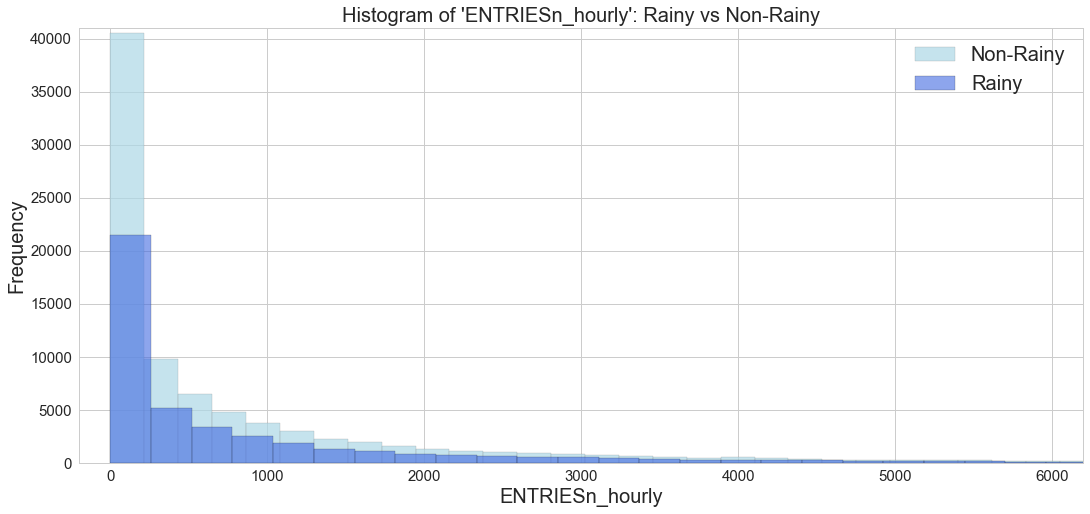

In [28]:
hide_code
rainy_entries_hourly = turnstile_data['ENTRIESn_hourly'][turnstile_data['rain']==1]
non_rainy_entries_hourly = turnstile_data['ENTRIESn_hourly'][turnstile_data['rain']==0]

matplotlib.rcParams['figure.figsize'] = (18, 8)
plt.style.use('seaborn-whitegrid')
plt.figure()

non_rainy_entries_hourly.hist(bins=200, color = 'lightblue', edgecolor='grey',alpha=0.7)
rainy_entries_hourly.hist(bins=200, color='royalblue', edgecolor='black', alpha=0.6)

plt.xlabel("ENTRIESn_hourly", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.tick_params(axis='both', labelsize=15)
plt.axis((-200,6200,0,41000))
plt.title("Histogram of 'ENTRIESn_hourly': Rainy vs Non-Rainy", fontsize=20)
plt.legend(['Non-Rainy','Rainy'], fontsize=20);

As the reader can see, two distributions have the very similar shapes but with different levels of *'ENTRIESn_hourly'* and the data is not normally distributed. I should note that the mean and the median vary significantly (indicating a large skew). Also, it's easy to see that the sample sizes has a huge difference: rainy days - 44104, non-rainy days - 87847.

If I apply a non-linear logarithmic scaling to the normalized histogram we will observe very similar shapes, and it looks closer to the normal distributions.

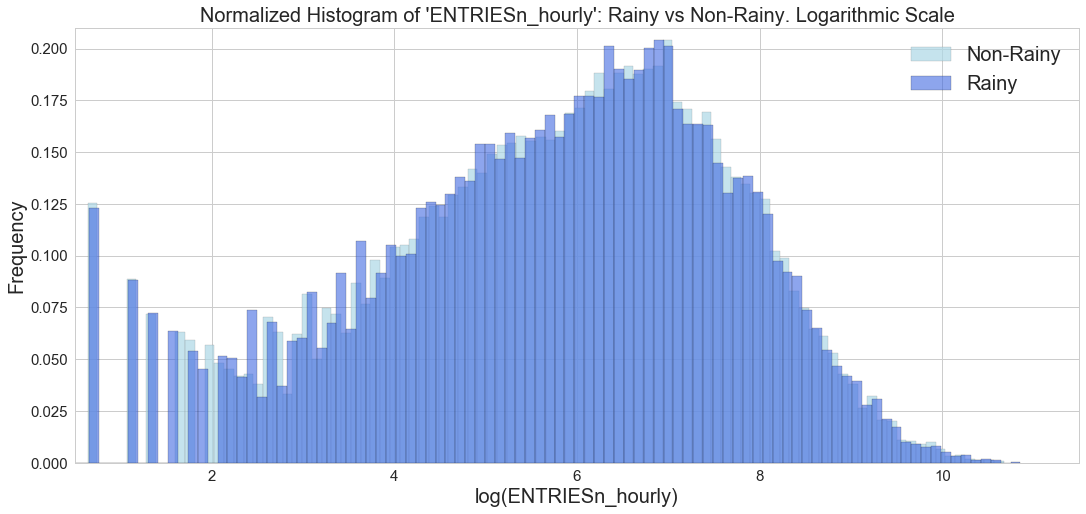

In [29]:
hide_code
matplotlib.rcParams['figure.figsize'] = (18, 8)
plt.style.use('seaborn-bright')
plt.figure()

np.log(non_rainy_entries_hourly+1).hist(bins=100, color = 'lightblue', edgecolor='grey',alpha=0.7, normed=1)
np.log(rainy_entries_hourly+1).hist(bins=100, color='royalblue', edgecolor='black', alpha=0.6, normed=1)

plt.axis((0.5,11.5,0,0.21))
plt.xlabel("log(ENTRIESn_hourly)", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.tick_params(axis='both', labelsize=15)
plt.title("Normalized Histogram of 'ENTRIESn_hourly': Rainy vs Non-Rainy. Logarithmic Scale", fontsize=20)
plt.legend(['Non-Rainy','Rainy'], fontsize=20);

***Question 3.2*** One visualization can be more freeform. You should feel free to implement something that we discussed in class (e.g., scatter plots, line plots) or attempt to implement something more advanced if you'd like. Some suggestions are:

- Ridership by time-of-day
- Ridership by day-of-week

***Answer 3.2***

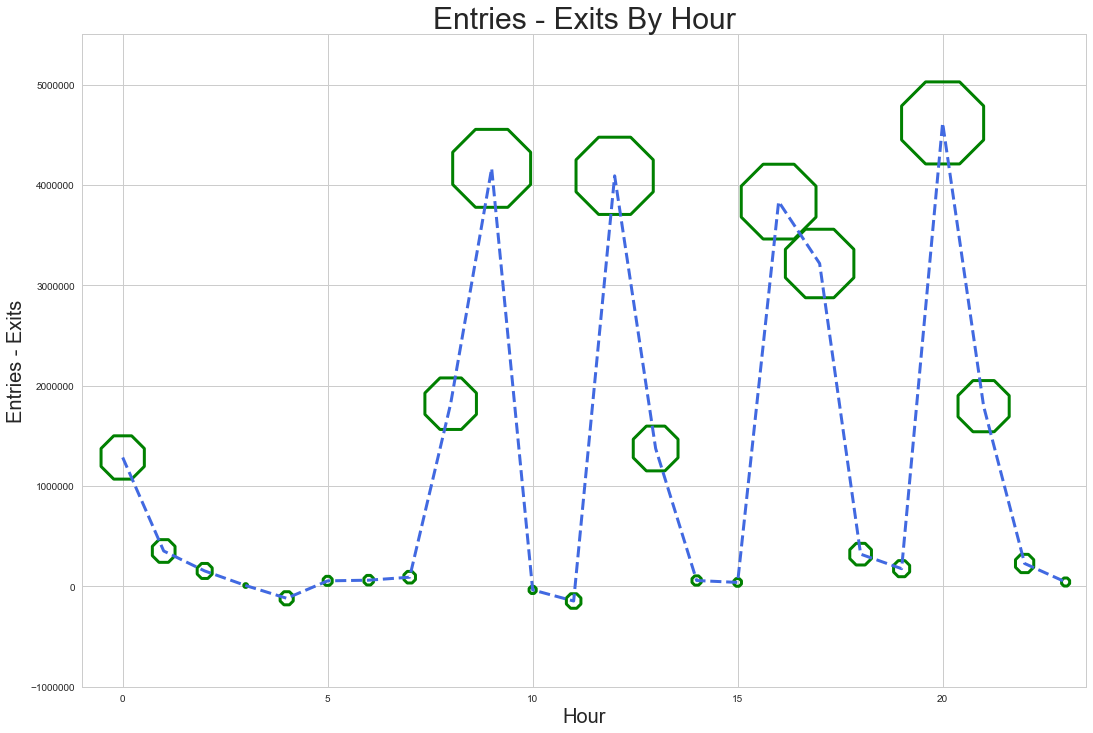

In [30]:
hide_code
turnstile_data['entries_exits'] = turnstile_data['ENTRIESn_hourly'] - turnstile_data['EXITSn_hourly']
data = turnstile_data[['Hour','entries_exits']].groupby('Hour',as_index=False).sum()

matplotlib.rcParams['figure.figsize'] = (18, 12)
plt.style.use('seaborn-bright')

plt.figure()

plt.plot(data['Hour'], data['entries_exits'], '--', lw=3, color='royalblue')

psize=list(2000*data['entries_exits'].abs()/data['entries_exits'].abs().mean())
plt.scatter(data['Hour'], data['entries_exits'], s=psize, marker='8',
            facecolors='none', edgecolors='g', linewidth='3')

plt.axis((-1, 23.5,-1000000,5500000))
plt.xlabel('Hour', fontsize=20)
plt.ylabel('Entries - Exits', fontsize=20)
plt.title('Entries - Exits By Hour', fontsize=30);

This graph shows the difference between the number of passengers' enters and exits for each hour and therefore helps to determine the number of passengers in the underground at certain hours.

### &#x1F4CA; &nbsp;  Section 4. Conclusion

Please address the following questions in detail. Your answers should be 1-2 paragraphs long.

***Question 4.1*** From your analysis and interpretation of the data, do more people ride
the NYC subway when it is raining or when it is not raining?  

***Answer 4.1***


The Mann-Whitney U-Test detects statistical significance of the difference in the NYC subway ridership in rainy and non-rainy days. But I cannot confirm the steady trend that more people use the NYC subway in rainy days. In the next answer I will explain my doubts.

***Question 4.2*** What analyses lead you to this conclusion? You should use results from both your statistical
tests and your linear regression to support your analysis.

***Answer 4.2***

There are some reasons why it needs to detect more clear tendencies in the ridership measuring.

- 1) The result of the Mann-Whitney U-Test is very close to the borders of the confidence interval so the next samples could not repeat it.
- 2) The influence of the variable 'rain' is possible combined with other weather conditions.
- 3) The mean and the median for two samples do not have the statistical significance difference (about 1 % in both cases).
- 4) The normalized distributions have very similar shapes.
- 5) All linear models in the projects with the variable 'rain' in the feature set do not demonstrate so good fitting and have less R2 scores than I expected.
- 6) As we can see below, excluding the variable 'rain' does not affect the models' R2 scores significantly.

In [31]:
# Means' Difference
100.0*(1105-1090)/1105

1.3574660633484164

In [32]:
# Medians' Difference
100.0*(282-278)/282

1.4184397163120568

In [33]:
hide_code
# Feature list without 'rain'
numerical3 = ['hour', 'weekday', 'meantempi']

In [34]:
hide_code
print ("Predictions with the feature 'rain'")
print('')
print ("Built functions, R^2 = {}".format(r2_score(turnstile_data2['ENTRIESn_hourly'], predict[0])))
print('')
print ('OLS model, R^2 = {}'.format(ols_predict[2]))
print('')
print ('SGDRegressor, R^2 = {}'.format(sgd_predict[2]))

Predictions with the feature 'rain'

Built functions, R^2 = 0.48231177470460174

OLS model, R^2 = 0.48233211583137825

SGDRegressor, R^2 = 0.4544477659006146


In [35]:
hide_code
print ("Predictions without the feature 'rain'")
print('')
predict3 = predictions(turnstile_data2, numerical3, 'ENTRIESn_hourly')
print ("Built functions, R^2 = {}".format(r2_score(turnstile_data2['ENTRIESn_hourly'], predict3[0])))
print ('')
ols_predict3 = ols_predictions(turnstile_data2, numerical3)
print ('OLS model, R^2 = {}'.format(ols_predict3[2]))
print('')
sgd_predict3 = sgd_predictions(turnstile_data2, numerical3)
print ('SGDRegressor, R^2 = {}'.format(sgd_predict3[2]))

Predictions without the feature 'rain'

Built functions, R^2 = 0.4822906103075967

OLS model, R^2 = 0.4823073240073492

SGDRegressor, R^2 = 0.4541606603103347


### &#x1F4CA; &nbsp;  Section 5. Reflection

Please address the following questions in detail. Your answers should be 1-2 paragraphs long.

***Question 5.1*** Please discuss potential shortcomings of the methods of your analysis, including:

- Dataset,
- Analysis, such as the linear regression model or statistical test.

***Answer 5.1***

The dataset and analysis have potential shortcomings.

- ***Dataset.***
  - 1) The dataset only consists of information for a single month. It can be a too short period for exact analysis: short-term or random events can affect the subway ridership. 
  - 2) The result of the Mann-Whitney test can be biased because of events in the short period and it is too close to the borders of the confidence interval. 
  - 3) I think some influential features for the ridership does not present in the dataset.
  
- *** Models***.
  - 1) Some features can be dependent and highly correlated, it reduces the models' accuracies.
  - 2) Linear regressions could be not so good model in ridership predictions with this dataset features:  'ENTRIESn_hourly' could have a non-linear dependence from other variables.
  - 3) Linear model could not have enough accuracy in predictions of huge values when the important features are not presented.
  
I can confirm my doubts by creating one additional visualization. It displays very clearly how close predictions of different models to each other and how they far away from the real data.

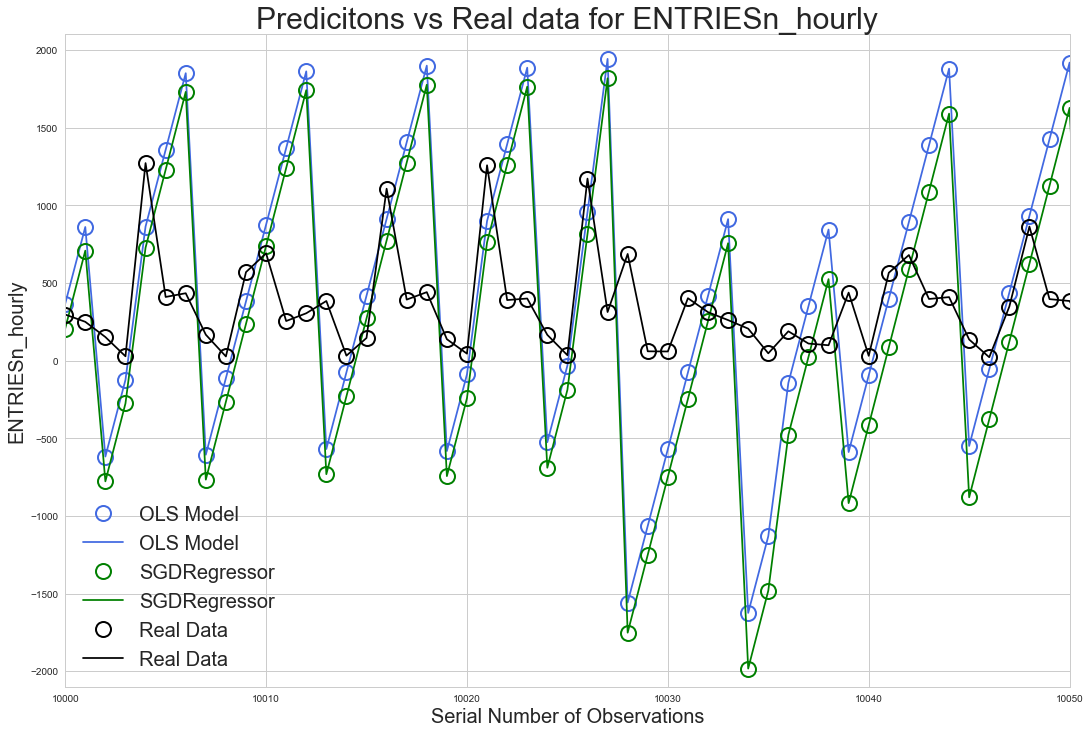

In [39]:
hide_code
matplotlib.rcParams['figure.figsize'] = (18, 12)
plt.style.use('seaborn-bright')

plt.figure()

plt.plot(ols_predict[0], 'o', markersize=15, 
         markeredgecolor='royalblue', markerfacecolor="None", markeredgewidth=2)
plt.plot(ols_predict[0], color='royalblue')

plt.plot(sgd_predict[0], 'o', markersize=15, 
         markeredgecolor='green', markerfacecolor="None", markeredgewidth=2)
plt.plot(sgd_predict[0], color='green')

plt.plot(turnstile_data2['ENTRIESn_hourly'], 'o', markersize=15, 
         markeredgecolor='black', markerfacecolor="None", markeredgewidth=2)
plt.plot(turnstile_data2['ENTRIESn_hourly'], color='black')

plt.axis((10000,10050,-2100,2100))
plt.xlabel('Serial Number of Observations', fontsize=20)
plt.ylabel('ENTRIESn_hourly', fontsize=20)
plt.title('Predicitons vs Real data for ENTRIESn_hourly', fontsize=30)
plt.legend(['OLS Model', 'OLS Model', 'SGDRegressor', 'SGDRegressor', 'Real Data', 'Real Data'], fontsize=20);

***Question 5.2*** (Optional) Do you have any other insight about the dataset that you would like to share with us?

***Answer 5.2***

I would like to display information about enough high correlation indicators for the variable 'rain'. It reduced accuracy for any prediction models.

In [37]:
hide_code
# Create new dataset for correlation matrix
list1 = ['maxdewpti', 'minpressurei', 'mindewpti', 'maxpressurei',
         'meandewpti', 'meanpressurei', 'fog', 'rain',
         'meanwindspdi', 'mintempi', 'meantempi', 'maxtempi', 'precipi']
data = turnstile_data[list1]

In [38]:
hide_code
new_data = data.drop('rain', axis = 1)
target = data['rain']
new_data_target = pd.concat([new_data, target], axis = 1)
# Display the correlation table for the given feature
print ("The correlation table for the choosen feature 'rain'")
pearson = new_data_target.corr(method='pearson')
corr_with_delicatessen = pearson.iloc[-1][:-1]
corr_with_delicatessen[abs(corr_with_delicatessen).argsort()[::-1]]

The correlation table for the choosen feature 'rain'


precipi          0.566747
fog              0.444902
maxdewpti        0.399360
meandewpti       0.390681
mindewpti        0.345576
meanpressurei   -0.250252
maxtempi        -0.242138
minpressurei    -0.217414
maxpressurei    -0.166759
meantempi       -0.151172
meanwindspdi     0.061620
mintempi        -0.021877
Name: rain, dtype: float64